<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/DeepLearning/Assignment_41/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [309]:
dataset = tf.keras.datasets.mnist
(X_train, Y_train) , (X_test, Y_test) = dataset.load_data()
(x_train, y_train) , (x_test, y_test) = dataset.load_data()

In [310]:
print(X_train.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)

(60000, 28, 28)
0 255 uint8
0 9 uint8


7


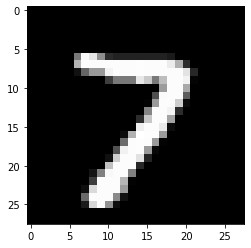

In [311]:
plt.imshow(X_train[4000] , cmap='gray')
print(Y_train[4000])

**MPL (Machine Learning) For mnist** 




In [312]:
X_train = X_train.reshape(60000 , 784)

In [313]:
model = tf.keras.models.Sequential([
      layers.Dense(64, input_dim=784, activation = 'relu') ,
      layers.Dense(32, activation = 'relu') ,
      layers.Dense(10, activation = 'softmax') ,

])

In [314]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [315]:
model.fit(X_train, Y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8477 - accuracy: 0.5132
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7094 - accuracy: 0.7967
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3933 - accuracy: 0.9083
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2791 - accuracy: 0.9331
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2193 - accuracy: 0.9467
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1816 - accuracy: 0.9540
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1596 - accuracy: 0.9589


In [316]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_89 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [317]:
X_test.shape

(10000, 28, 28)

In [318]:
X_test = X_test.reshape(10000,784)

In [319]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9545


[0.18379665911197662, 0.9545000195503235]

**CNN + MLP (Deep Learning) For mnist**

In [320]:
x_train , x_test = x_train /255.0 , x_test / 255.0

In [321]:
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [322]:
model = tf.keras.models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10, activation='softmax')
])

In [323]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 64)                346176    
_________________________________________________________________
dense_91 (Dense)             (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [324]:
model.fit(x_train , y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1696 - accuracy: 0.9513
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0595 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0391 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0213 - accuracy: 0.9930


In [325]:
Accuracy = model.evaluate(x_test , y_test)
print ("Deep Accuracy ==========>" , Accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0542 - accuracy: 0.9835
Deep Accuracy ==========> [0.05417240783572197, 0.9835000038146973]
